In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Predição de Satisfação de Passageiro com a viagem aérea

Essa é uma tentativa de predição de satisfação de um passageiro com a viagem feita por avião. Os dados estão disponíveis no [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). O *dataset* é composto por 24 *features* para prever o *target* que é o nível de satisfação de um passageiro entre *neutral/dissatisfied* e *satisfied*, ou seja, uma classificação binária.

Escolhi um dataset tabular pois queria algo que me permitisse testar vários tipos de modelos, coisa que acredito que não seria possível com um dataset, por exemplo, de imagens pois, para mim, a principal abordagem seria "simplesmente" testar configurações de redes neurais convolucionais. Com dados tabulares, posso validar vários modelos, inclusive uma rede neural.

Assim sendo, é um problema que pode ser resolvido com modelos supervisionados, já que temos a informação do nível de satisfação de um passageiro.

# Sumário

- <b>Caracterização e tratamento do dataset</b>
- <b>Aplicando os modelos</b>
    - <b>Dividindo em dados de treino e de teste</b>
    - <b>Treinando os modelos</b>
- <b>Análise dos Resultados</b>
- <b>Comentários finais</b>

# Caracterização e tratamento do dataset

In [2]:
train_df = pd.read_csv("./dataset/train.csv")
test_df = pd.read_csv("./dataset/test.csv")

Os dados já vieram separados em dados de treino (80%) e de teste (20%).

In [3]:
print(f"A quantidade de dados de treino é {len(train_df)}")
print(f"A quantidade de dados de teste é {len(test_df)}")

A quantidade de dados de treino é 103904
A quantidade de dados de teste é 25976


In [4]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

O dataset possui 25 colunas, sendo uma delas a coluna alvo (*satisfaction*). Podemos perceber, entretanto, que a coluna 0 (Unnamed: 0) e 1 (id) não são de interesse para a classificação. Além disso, a maioria das colunas é categórica. Dessa forma, podemos alterar os seus tipos de int64 para category. As colunas do tipo object também são categóricas e podemos extrair *dummy_variables* delas.

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [7]:
train_df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
test_df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Podemos perceber que, em ambos os arquivos, existem dados faltando para a coluna *Arrival Delay in Minutes*. Nesse caso, irei supor que os valores faltando são iguais a 0.

In [9]:
train_df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [10]:
test_df['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

Pode-se ver que existe uma boa proporção de dados de cada classe tanto no treino quanto no teste

Vamos, de fato, limpar os dados agora. O espaço ocupado pelos dados de treino, em KB, é:

In [11]:
train_df.memory_usage().sum()/1024

20293.875

Já o de teste:

In [12]:
test_df.memory_usage().sum()/1024

5073.5625

In [13]:
from sklearn.preprocessing import MinMaxScaler

def transform_to_categorical(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = df[col].astype('category')
    
    return df

def fill_with_zero(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = df[col].fillna(0)
    
    return df

def to_dummies(df, cols):
    df = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col], drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, inplace=True, axis=1)
    
    return df

def normalize(df, cols, scaler, already_fitted_scaler):
    numerical_only_data = df[cols]
    if not already_fitted_scaler:
        scaler.fit(numerical_only_data.values)
    
    numerical_scaled = scaler.transform(numerical_only_data.values)
    df[cols] = numerical_scaled
    return df

def to_float_32(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = df[col].astype("float32")
    
    return df
        
def clean_data(df, scaler, already_fitted_scaler=False):
    cleaned_df = df.drop(['Unnamed: 0', 'id'], axis=1)
    
    #Preenchendo com zeros
    COL_WITH_NAN = ['Arrival Delay in Minutes']
    cleaned_df = fill_with_zero(cleaned_df, COL_WITH_NAN)
    
    #Conseguir dummy variables dos categoricals objects
    COLS_TO_DUMMY = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
    cleaned_df = to_dummies(cleaned_df, COLS_TO_DUMMY)
    
    #Transformando em categorical
    NUM_COLS = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']
    CAT_COLS = cleaned_df.columns.difference(NUM_COLS)
    cleaned_df = transform_to_categorical(cleaned_df, CAT_COLS)
    
    #Normalizar colunas
    cleaned_df = normalize(cleaned_df, NUM_COLS, scaler, already_fitted_scaler)
    
    cleaned_df = to_float_32(cleaned_df, NUM_COLS)
    
    return cleaned_df

In [14]:
scaler = MinMaxScaler()

In [15]:
cleaned_train_df = clean_data(train_df, scaler, False)

In [16]:
cleaned_train_df.columns.difference(train_df.columns)

Index(['Eco', 'Eco Plus', 'Male', 'Personal Travel', 'disloyal Customer',
       'satisfied'],
      dtype='object')

Podemos ver que novas colunas surgiram. Todas elas vieram a partir de *dummy_variables* de alguma outra. Até mesmo a coluna *target* de nome *satisfied* teve seu conteúdo alterado de "unsatified/neutral" e "satisfied" para 0's ou 1's sendo 1 representando satisfação.

In [17]:
cleaned_test_df = clean_data(test_df, scaler, True)

Perceba que reusei o scaler fitado nos dados de treino sobre os de teste. Agora, os *Dataframes* com os dados ocupam, em KB:

In [18]:
cleaned_train_df.memory_usage().sum()/1024

3354.9609375

In [19]:
cleaned_test_df.memory_usage().sum()/1024

843.5859375

Menos de um quarto do valor inicial. Além disso, as colunas quantitativas estão normalizadas em ambos os *datasets*.

In [20]:
cleaned_train_df.describe()[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']]

,Departure Delay in Minutes,Arrival Delay in Minutes,Flight Distance
count,103904.000000,103904.000000,103904.000000
mean,0.009306,0.009554,0.233935
std,0.024014,0.024400,0.201363
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.077342
50%,0.000000,0.000000,0.163974
75%,0.007538,0.008207,0.345719
max,1.000000,1.000000,1.000000


In [21]:
cleaned_test_df.describe()[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']]

,Departure Delay in Minutes,Arrival Delay in Minutes,Flight Distance
count,25976.000000,25976.000000,25976.000000
mean,0.008986,0.009276,0.234812
std,0.023507,0.023653,0.201673
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.077342
50%,0.000000,0.000000,0.165186
75%,0.007538,0.008207,0.345921
max,0.708543,0.703914,1.000000


In [22]:
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Age                                103904 non-null  category
 1   Flight Distance                    103904 non-null  float32 
 2   Inflight wifi service              103904 non-null  category
 3   Departure/Arrival time convenient  103904 non-null  category
 4   Ease of Online booking             103904 non-null  category
 5   Gate location                      103904 non-null  category
 6   Food and drink                     103904 non-null  category
 7   Online boarding                    103904 non-null  category
 8   Seat comfort                       103904 non-null  category
 9   Inflight entertainment             103904 non-null  category
 10  On-board service                   103904 non-null  category
 11  Leg room service          

# Aplicando os modelos

Para tentar realizar as predições, irei validar os seguintes modelos:

- KNN
- HistGradientBoostingClassifier
- Rede Neural

Mais sobre eles nas seções a seguir

## Treinando os modelos

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [24]:
CATEGORICAL_COLS_MASK = [True, False] + [True]*14 + [False]*2 + [True]*5

In [25]:
DEFAULT_RANDOM_STATE = 42
#https://stackoverflow.com/a/61183983/16264901
knn_clf = KNeighborsClassifier(n_jobs=-1, algorithm='ball_tree')
hist_clf = HistGradientBoostingClassifier(random_state=DEFAULT_RANDOM_STATE, l2_regularization=1,
                                        categorical_features=CATEGORICAL_COLS_MASK)
neural_clf = MLPClassifier(solver='adam', random_state=DEFAULT_RANDOM_STATE)

 - <b>Modelo KNN:</b> Apesar de considerar a dimensionalidade como  razoavelmente alta, gostaria de ver se um modelo de agrupamento simples conseguiria performar bem. Para tal, de acordo com a documentação o algoritmo '[ball-tree](https://scikit-learn.org/stable/modules/neighbors.html#ball-tree)' deve performar melhor em quantidade de computações quando a dimensionalidade do dado é maior do que 20 comparado ao [K-DTree](https://scikit-learn.org/stable/modules/neighbors.html#k-d-tree).

- <b>Modelo HistGradientBoostingClassifier:</b> De acordo com a documentação, o sklearn possui essa nova implementação de gradient boosting trees para classificação. Esse modelo é inspirado no LightGBM e usa [histogramas](https://scikit-learn.org/stable/modules/ensemble.html#why-it-s-faster) para dividir os dados. Além disso, na [documentação](https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting) é dito que ele poderia ser ordens de magnitude melhor do que o GradientBoosting caso a quantidade de dados seja maior do que dezenas de milhares, que é o caso atual.

- <b>Modelo Neural:</b> Defini o solver do modelo neural como 'adam', uma variação de stochastic gradient-based optimizer, pois, na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), está descrito como funcionar relativamente bem em datasets razoáveis, que, no caso, é de 103k entradas.

In [26]:
ensemble_clf=[knn_clf, hist_clf, neural_clf]

Vamos realizar um GridSearch com validação cruzada de 5 folds.

In [27]:
hist_params={"learning_rate":[0.001,0.01,0.1], "max_iter":range(100,1000,200), 'max_depth':range(1, 20, 4)}
knn_params = {"n_neighbors": [5, 9, 13, 18], "metric":['euclidean']}
neural_params = {"hidden_layer_sizes":[(20), (20, 10), (20, 10, 5), (20, 10, 5, 3)], "max_iter":[25000]}

- <b>HistGradientBoostingClassifier:</b> Por ser um modelo de boosting, os decision stumps do modelo podem/devem ser de baixíssima capacidade. Por padrão, o sklearn não define a profundidade máxima das árvores, portanto, variei esse valor entre 1 e 20. Além disso, variei a quantidade máxima de decision stumps até 1000 pois os modelos de boosting são bem robustos. Também variei o *learning_rate*.

- <b>KNN:</b> As principais questões do modelo KNN é como computar a distância dos pontos e a quantidade de vizinhos a serem levados em consideração. Dessa forma, defini a métrica de distância como a distância euclidiana e variei a quantidade de vizinhos até 13. Um valor baixo de vizinhos (5) supõe que as classes de dados sejam bem definidas e um valor mais alto (18) supõe que eles estejam mais misturados/sejam ruidosos.

- <b>Neural:</b> Considerando que são 23 features de entrada, resolvi testar quatro configurações diferentes, sendo eles:

     - 1 camada oculta: Possui uma camada oculta com 20 nós, totalizando 95*20 + 20 = 1920 pesos a serem aprendidos.
     - 2 camadas ocultas: A primeira camada oculta com 20 nós e a segunda com 10 nós, totalizando 95*20 + 20*10 + 10 = 2110 pesos a serem aprendidos
     - 3 camadas ocultas: A primeira camada oculta com 20 nós, a segunda com 10 e a terceira com 5, totalizando 95*20 + 20*10 + 10*5 + 5 = 2155 pesos a serem aprendidos
     - 4 camadas ocultas: A primeira camada oculta com 20 nós, a segunda com 10, a terceira com 5 e a quarta com 3 totalizando 95*20 + 20*10 + 10*5 + 5*3 + 3 = 2168 pesos a serem aprendidos

    Por padrão, o *early-stopping* já é definido como *False*, mas, apesar disso, o treinamento é interrompido se o modelo não melhorar por 0.0001 durante 10 iterações. Considerando que temos 103k entradas com 5 *folds*, considerei que um número de iterações máximo de 25 mil talvez já fosse suficiente para o modelo convergir.

In [28]:
parameters_list=[knn_params, hist_params, neural_params]

<b>ATENÇÃO:</b> Se quiser executar, de fato, os modelos, defina a variável JUST_LOAD_DATA como False. Se quiser apenas carregar os melhores modelos encontrados, defina JUST_LOAD_DATA como True.

In [29]:
JUST_LOAD_DATA = True

models = ['knn', "hist_boosting", 'neuralNet']

best_models = []
best_scores = []
best_params = []
all_params = {}
mean_test_scores = {}
best_index = {}

import pathlib
    
target_models_dir = pathlib.Path("./models")
target_models_dir.mkdir(exist_ok=True, parents=True)

if JUST_LOAD_DATA:
    from joblib import load
    for model in models:
        grid = load(target_models_dir / f"grid_{model}.joblib")
        best_models.append(grid.best_estimator_)
        best_scores.append(grid.best_score_)
        best_params.append(grid.best_params_)
        all_params[model] = grid.cv_results_['params']
        mean_test_scores[model] = grid.cv_results_['mean_test_score']
        best_index[model] = grid.best_index_
else:
    from sklearn.model_selection import GridSearchCV
    from joblib import dump
    
    TARGET_COL = "satisfied"
    X_train = cleaned_train_df.drop(TARGET_COL, axis=1)
    y_train = cleaned_train_df[TARGET_COL]

    for i in range(len(ensemble_clf)):
        grid=GridSearchCV(estimator=ensemble_clf[i], param_grid=parameters_list[i], 
                          n_jobs=-1, cv=5, verbose=3, scoring='accuracy').fit(X_train, y_train)
        best_models.append(grid.best_estimator_)
        best_scores.append(grid.best_score_)
        best_params.append(grid.best_params_)
        all_params[models[i]] = grid.cv_results_['params']
        mean_test_scores[models[i]] = grid.cv_results_['mean_test_score']
        best_index[models[i]] = grid.best_index_
        dump(grid.best_estimator_,target_models_dir / f"best_{models[i]}.joblib")
        dump(grid, target_models_dir / f"grid_{models[i]}.joblib")

# Análise dos Resultados

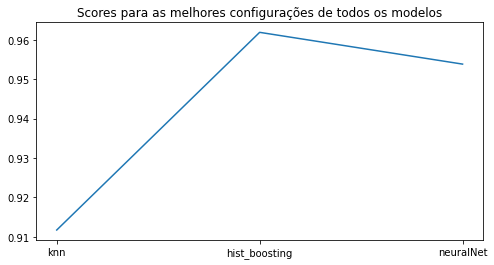

In [30]:
plt.figure(figsize=(8,4))
plt.plot(models, best_scores)
plt.title("Scores para as melhores configurações de todos os modelos")
plt.show()

In [31]:
for model, score in zip(models, best_scores):
    print(f"Score do {model}: {score}")

Score do knn: 0.9117166130366641
Score do hist_boosting: 0.9618975429126861
Score do neuralNet: 0.9538323848332805


De acordo com os resultados, o modelo que melhor performou foi o HistGradientBoosting. Sua melhor configuração obteve um *score* médio de 0.96 na validação cruzada. A rede neural ficou bem próxima com 0.95. O KNN ficou mais atrás com 0.91.

A melhor configuração do HistGradientBoost foi:

In [32]:
best_params[1]

{'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 300}

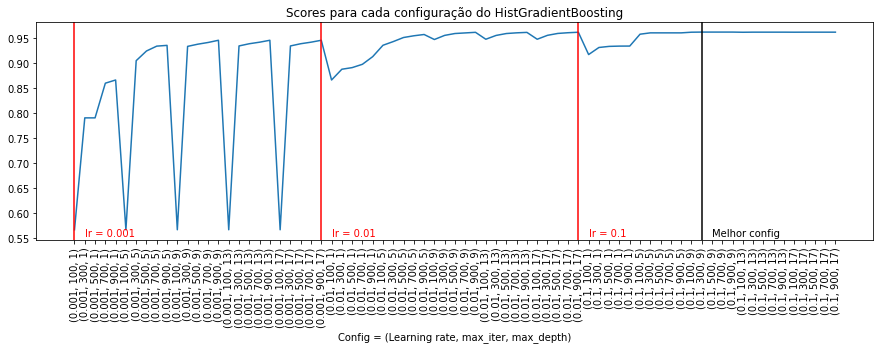

In [33]:
params_axis = [f"({param['learning_rate']}, {param['max_iter']}, {param['max_depth']})" 
                   for param in all_params[models[1]]]
plt.figure(figsize=(15,4))
plt.plot(params_axis, mean_test_scores[models[1]])
plt.xticks(rotation=90)
plt.title("Scores para cada configuração do HistGradientBoosting")

plt.axvline(0, color='red')
plt.text(1, 0.555, "lr = 0.001", color='red')

plt.axvline(24, color='red')
plt.text(25, 0.555, "lr = 0.01", color='red')

plt.axvline(49, color='red')
plt.text(50, 0.555, "lr = 0.1", color='red')

plt.axvline(61, color='black')
plt.text(62, 0.555, "Melhor config")

plt.xlabel("Config = (Learning rate, max_iter, max_depth)")
plt.show()

Pode-se perceber que, quanto maior o learning_rate, melhor o desempenho do modelo. Lembrando que o parâmetro max_iter é, na verdade, a quantidade máxima de árvores utilizadas. No caso de learning_rate de 0.001, o desempenho do modelo cai significativamente quando a quantidade de árvores é 100.

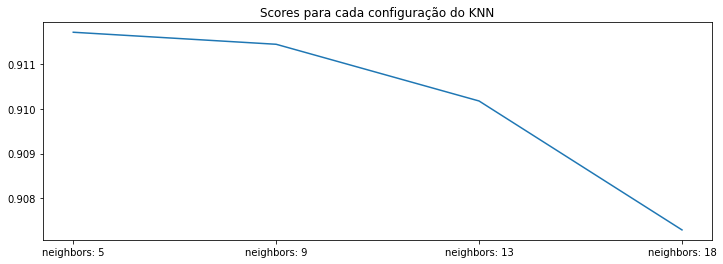

In [34]:
params_axis = [f"neighbors: {param['n_neighbors']}" for param in all_params[models[0]]]
plt.figure(figsize=(12,4))
plt.plot(params_axis, mean_test_scores[models[0]])
plt.title("Scores para cada configuração do KNN")
plt.show()

De acordo com o KNN, os dados talvez não sejam muito bem separados pois, ao considerar cada vez mais vizinhos, o modelo vai perdendo acurácia. Pode-se supor que, com menos vizinhos ainda considerados, por exemplo, 3, o modelo teria um desempenho melhor ainda.

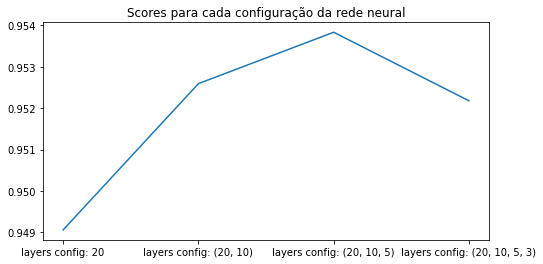

In [35]:
params_axis = [f"layers config: {param['hidden_layer_sizes']}" for param in all_params[models[2]]]
plt.figure(figsize=(8,4))
plt.plot(params_axis, mean_test_scores[models[2]])
plt.title("Scores para cada configuração da rede neural")
plt.show()

Interessante notar que o modelo neural foi melhorando de desempenho até 3 camadas, entretanto, a diferença percebida foi muito baixa de acordo com a escala do eixo y.

Para todos os modelos, tentei salvar os *scores* de treino, entretanto, como a própria documentação do GridSearchCV informa, calcular o score para o treino é computacionalmente caro e, de fato, não consegui esses dados.

In [36]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

def plotBestEstimatorResults(estimator, X_test, y_test, model_name):
    y_pred = estimator.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))
    
    plotConfusionMatrix(y_test, y_pred, model_name)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plotROC(fpr, tpr, model_name)
    
    plotPrecisionRecall(estimator, y_test , y_pred, model_name)
    
def plotConfusionMatrix(y_test, y_pred, model=None):
    """
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
    """
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
    plt.show()

def plotROC(fpr, tpr, model_name):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """
    plt.figure(figsize=(8,6))
    lw = 2
    aucArea = auc(fpr,tpr)
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % aucArea,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

def plotPrecisionRecall(estimator, y_true, y_pred, modelName):
    display = PrecisionRecallDisplay.from_predictions(
        y_true, y_pred, name=modelName
    )
    _ = display.ax_.set_title("2-class Precision-Recall curve")
    plt.legend(loc='lower left')
    plt.show()

Vamos ver como a melhor configuração do HistGradientBoosting se sai nos dados de teste.

              precision    recall  f1-score   support

           0      0.957     0.979     0.968     14573
           1      0.973     0.944     0.958     11403

    accuracy                          0.964     25976
   macro avg      0.965     0.962     0.963     25976
weighted avg      0.964     0.964     0.964     25976



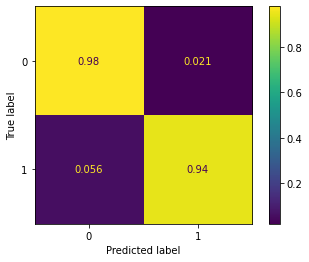

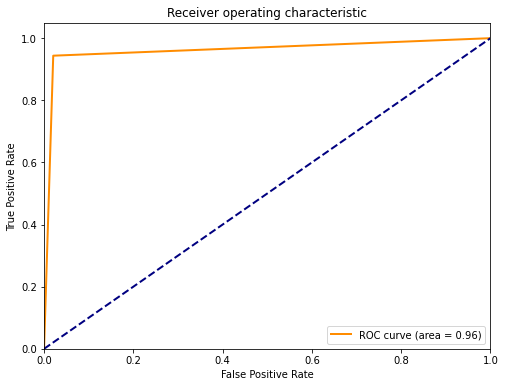

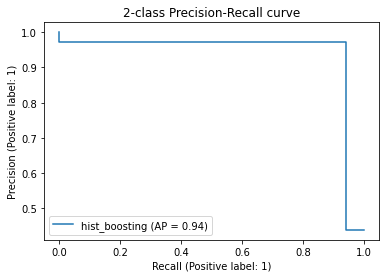

In [38]:
TARGET_COL = "satisfied"
X_test = cleaned_test_df.drop(TARGET_COL, axis=1)
y_test = cleaned_test_df[TARGET_COL]
plotBestEstimatorResults(best_models[1], X_test, y_test, models[1])

Felizmente, pode-se perceber que os resultados são bons. Os valores de precisão e revocação para ambas as classes estão ao redor de 95%. Como curiosidade, vejamos qual é o desempenho do modelo neural nos dados de teste:

              precision    recall  f1-score   support

           0      0.943     0.978     0.960     14573
           1      0.970     0.924     0.947     11403

    accuracy                          0.954     25976
   macro avg      0.957     0.951     0.953     25976
weighted avg      0.955     0.954     0.954     25976



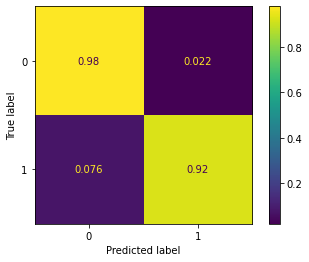

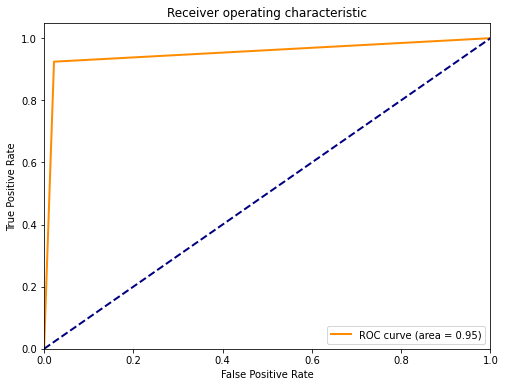

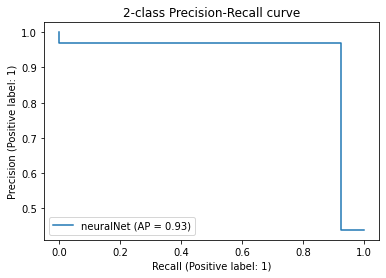

In [39]:
plotBestEstimatorResults(best_models[2], X_test, y_test, models[2])

O modelo neural parece ter uma performance muito parecida com o HistGradientBoosting. A única questão é que ele obtém uma revocação para a classe 1 menor do que o HistGradientBoosting.

# Comentários finais

O objetivo desse trabalho era aplicar três modelos diferentes em um *dataset* tabular para prever se um passageiro de um vôo ficaria satisfeito com a viagem dadas as cerca de 24 *features* disponíveis e os mais de 100 mil dados de treino. Pode-se dizer que esse objetivo foi alcançado tendo em vista os resultados mostrados acima.

O modelo de boosting HistGradientBoosting, inspirado no LightGBM, foi o que conseguiu melhor desempenho na validação cruzada e isso também se refletiu nos dados de teste com uma acurácia de 96.4%. Além disso, o modelo Neural com 3 camadas também obteve um *score* muito semelhante de 95.4%.

De forma geral, foi possível colocar em prática modelos e conceitos aprendidos ao longo da disciplina de Aprendizado de Máquina e também obter mais um pouco de experiência com a escolha e aplicação dos modelos levando em consideração características dos dados disponíveis como a dimensionalidade.